In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_25283/1521273946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Leyendo Archivo de Listado de recursos
df = pd.read_csv('Listado_Recursos_Generacion.csv' , header=3)

In [3]:
df

,Código SIC,Nombre Recurso,Capacidad Efectiva Neta [MW],Factor de Conversión,Es Menor,Tipo Despacho,Combustible por Defecto,Fecha Operación,Municipio,Departamento,Agente Representante,Estado Recurso,Tipo Generación,Clasificación
0,3JNR,AUTOG UNIBOL 1,5,7.500,SI,ND,GAS,02/11/2024,BARRANQUILLA,ATLÁNTICO,ENERCO S.A. E.S.P.,OPERACIÓN,TERMICA,AUTOGENERADOR
1,TCBE,TERMOCARIBE III 1,42,8.703,NO,DC,GAS,11/24/2022,SANTA ROSADE LIMA,BOLÍVAR,TERMO CARIBE S.A.S. E.S.P.,PRUEBAS,TERMICA,NORMAL
2,3C3X,AUTOG INGENIO MARIA LUISA,2,0.000,NO,ND,BAGAZO,08/14/2021,FLORIDA,VALLE DEL CAUCA,DEPI ENERGY S.A.S. E.S.P.,OPERACIÓN,TERMICA,AUTOGENERADOR
3,3AXV,AGPE INGENIO DE OCCIDENTE,1,0.000,NO,ND,BAGAZO,03/04/2021,VILLA RICA,CAUCA,EMPRESA MUNICIPAL DE ENERGIA ELECTRICA S.A. E....,OPERACIÓN,TERMICA,AUTOG PEQ. ESCALA
4,3AL6,AGPE ENTREPALMAS,1,0.000,NO,ND,BIOGAS,12/31/2020,SAN MARTIN,META,CELSIA COLOMBIA S.A. E.S.P.,OPERACIÓN,TERMICA,AUTOG PEQ. ESCALA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,CAS1,CENTRAL CASTILLA 1,3,0.000,NO,ND,BAGAZO,08/15/2004,PRADERA,VALLE DEL CAUCA,RIOPAILA ENERGÍA S.A.S. E.S.P.,OPERACIÓN,COGENERADOR,COGENERADOR
365,IRG1,INGENIO RISARALDA 1,20,0.000,NO,ND,BAGAZO,08/15/2003,BALBOA,RISARALDA,EMPRESA DE ENERGIA DE PEREIRA S.A. E.S.P.,OPERACIÓN,COGENERADOR,COGENERADOR
366,PNC1,COGENERADOR PROENCA 1,4,0.000,NO,ND,CARBON,01/01/1999,CALOTO,CAUCA,PROYECTOS ENERGETICOS DEL CAUCA S.A. E.S.P.,INACTIVO,COGENERADOR,COGENERADOR
367,INC1,INCAUCA 1,60,0.000,NO,ND,BAGAZO,10/21/1998,MIRANDA,CAUCA,NITRO ENERGY COLOMBIA S.A.S. E.S.P.,OPERACIÓN,COGENERADOR,COGENERADOR


In [4]:
#Generacion de nueva tabla con los datos de la Fecha de Operacion, Agente y Capacidad de Generacion en ese dia
new_table = df[["Fecha Operación", "Agente Representante", "Capacidad Efectiva Neta [MW]"]]

In [5]:
new_table

,Fecha Operación,Agente Representante,Capacidad Efectiva Neta [MW]
0,02/11/2024,ENERCO S.A. E.S.P.,5
1,11/24/2022,TERMO CARIBE S.A.S. E.S.P.,42
2,08/14/2021,DEPI ENERGY S.A.S. E.S.P.,2
3,03/04/2021,EMPRESA MUNICIPAL DE ENERGIA ELECTRICA S.A. E....,1
4,12/31/2020,CELSIA COLOMBIA S.A. E.S.P.,1
...,...,...,...
364,08/15/2004,RIOPAILA ENERGÍA S.A.S. E.S.P.,3
365,08/15/2003,EMPRESA DE ENERGIA DE PEREIRA S.A. E.S.P.,20
366,01/01/1999,PROYECTOS ENERGETICOS DEL CAUCA S.A. E.S.P.,4
367,10/21/1998,NITRO ENERGY COLOMBIA S.A.S. E.S.P.,60


In [6]:
#Generamos archivo con nuevo Dataset que contiene la informacion de los dos archivos anteriores
new_table.to_csv('Pregunta2_tabla.csv', header=True)

In [7]:
#Generamos el dataset que contiene 3 Agentes: AES COLOMBIA & CIA. S.C.A. E.S.P., ELECTRIFICADORA DEL ATLANTICO S.A. E.S.P. y ENEL COLOMBIA SA ESP
table_agent = new_table[(new_table['Agente Representante'] == 'AES COLOMBIA & CIA. S.C.A. E.S.P.') | (new_table['Agente Representante'] == 'ELECTRIFICADORA DEL ATLANTICO S.A. E.S.P.') | (new_table['Agente Representante'] == 'ENEL COLOMBIA SA ESP')]

In [8]:
table_agent

,Fecha Operación,Agente Representante,Capacidad Efectiva Neta [MW]
40,12/14/1985,ENEL COLOMBIA SA ESP,63
41,04/01/1981,ENEL COLOMBIA SA ESP,64
42,01/01/1976,ENEL COLOMBIA SA ESP,63
43,01/01/1964,ENEL COLOMBIA SA ESP,36
57,07/20/1995,ELECTRIFICADORA DEL ATLANTICO S.A. E.S.P.,9
59,01/01/1971,ELECTRIFICADORA DEL ATLANTICO S.A. E.S.P.,9
60,01/01/1971,ELECTRIFICADORA DEL ATLANTICO S.A. E.S.P.,18
61,01/01/1971,ELECTRIFICADORA DEL ATLANTICO S.A. E.S.P.,9
62,01/01/1971,ELECTRIFICADORA DEL ATLANTICO S.A. E.S.P.,8
63,01/01/1972,ELECTRIFICADORA DEL ATLANTICO S.A. E.S.P.,11


In [9]:
#Generamos los ejex "x" y "y" de los 3 Agentes
#Eje X = Capacidad efectiva
#Eje Y = Fecha de operacion
x1 = table_agent['Agente Representante'] == 'ENEL COLOMBIA SA ESP'
x1 = table_agent[x1]
dx1 = x1['Capacidad Efectiva Neta [MW]']
y1 = x1['Fecha Operación']
y1 = y1.sort_values()

x2 = table_agent['Agente Representante'] == 'AES COLOMBIA & CIA. S.C.A. E.S.P.'
x2 = table_agent[x2]
dx2 = x2['Capacidad Efectiva Neta [MW]']
y2 = x2['Fecha Operación']
y2 = y2.sort_values()

x3 = table_agent['Agente Representante'] == 'ELECTRIFICADORA DEL ATLANTICO S.A. E.S.P.'
x3= table_agent[x3]
dx3 = x3['Capacidad Efectiva Neta [MW]']
y3 = x3['Fecha Operación']
y3 = y3.sort_values()

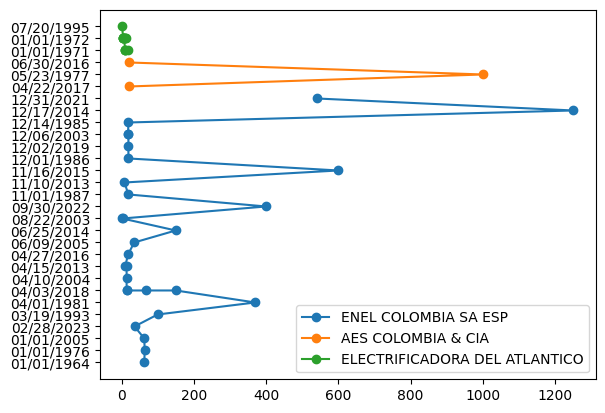

In [10]:
#Generamos Grafica
fig, ax = plt.subplots()
ax.plot(dx1,y1, marker="o",label='ENEL COLOMBIA SA ESP')
ax.plot(dx2,y2, marker="o",label='AES COLOMBIA & CIA')
ax.plot(dx3,y3, marker="o",label='ELECTRIFICADORA DEL ATLANTICO')
ax.legend()

In [11]:
#Exportamos resultado de la grafica a png
fig.savefig('pregunta2_grafico.png')